In [5]:
import matplotlib.pyplot as plt
import numpy as np

#### Let's Assume A Square Lattice (a1 = a2) and Display The Leonard Jones Potential on that Vacancy

In [6]:
def create_lattice(nSites,a1,a2):
    ind = 0
    coords = np.zeros([nSites**2,2])
    for i in range(nSites):
        for j in range(nSites):
            coords[ind,] = i * a1 + j * a2 + 1 
            ind += 1
    return coords

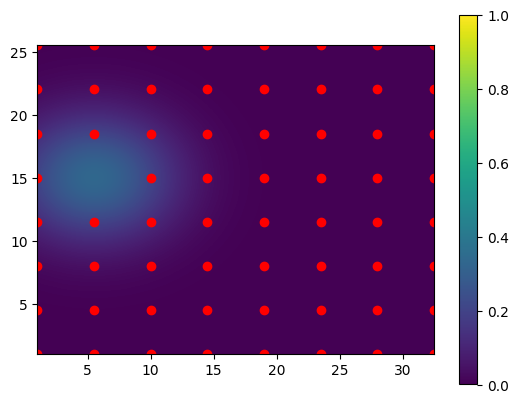

In [7]:
a1 = np.array([4.5,0])
a2 = np.array([0,3.5])

nSites = 8

# ind = 0
# coords = np.zeros([nSites**2,2])
# for i in range(nSites):
#     for j in range(nSites):
#         coords[ind,] = i * a1 + j * a2 + 1 
#         ind += 1

coords = create_lattice(nSites,a1,a2)

vacancyInd = 12

# Remove Center Coordinate 
vacancy = coords[vacancyInd,]
coords = np.delete(coords,vacancyInd,axis=0)

xLims = np.around(np.arange(np.min(coords[:,0]),np.max(coords[:,0])+0.1,0.1),decimals=1)
yLims = np.around(np.arange(np.min(coords[:,1]),np.max(coords[:,1])+0.1,0.1),decimals=1)
x, y = np.meshgrid(xLims,yLims)

A = 1 / 3 
Vlj = A * np.exp(-((x - vacancy[0])**2 / (2 * a1[0]**2) + (y - vacancy[1])**2. / (2 * a2[1]**2 )))


plt.imshow(Vlj[::-1],extent=[xLims[0],xLims[-1],yLims[0],yLims[-1]],vmax=1e0); plt.colorbar()
plt.scatter(coords[:,0],coords[:,1],color='r')

#### Repeat the Process Now with Only a Certain Number of Nearest Neighbors 

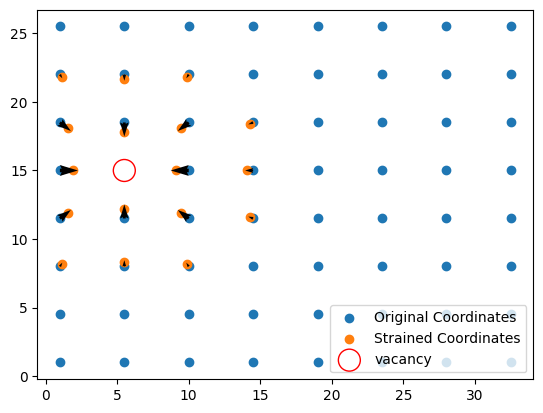

In [8]:
# Measure Distance From Vacancy
dist = np.sqrt((coords[:,0] - vacancy[0])**2 + (coords[:,1]-vacancy[1])**2)

# Distance Vectors
xDir = vacancy[0] - coords[:,0]; yDir = vacancy[1] - coords[:,1] 

aLim = np.minimum(a1[0],a2[1])
nnInds = np.where(dist < aLim*3)[0]
new_coords = np.zeros([nnInds.shape[0],2])
new_coords_ind = 0
for ind in nnInds:
    
    xInd = np.where( xLims == coords[ind,0] )[0][0]
    yInd = np.where( yLims == coords[ind,1] )[0][0]

    scale = Vlj[yInd,xInd]
    
    new_coords[new_coords_ind,0] = coords[ind,0] + xDir[ind] * scale
    new_coords[new_coords_ind,1] = coords[ind,1] + yDir[ind] * scale

    new_coords_ind += 1

plt.scatter(coords[:,0],coords[:,1],label='Original Coordinates')
plt.scatter(new_coords[:,0],new_coords[:,1],label='Strained Coordinates')
plt.quiver(coords[nnInds,0],coords[nnInds,1], new_coords[:,0] - coords[nnInds,0], new_coords[:,1] - coords[nnInds,1], scale=25)
plt.scatter(vacancy[0],vacancy[1],s=250,edgecolors='r',facecolors='none',label='vacancy')
plt.legend(loc='lower right')

#### Fantastic!!! Now Let's Add Multiple Vacancies to the Mix

#### Todo:
1. Add logic to sample unique points 
2. Append all the coordinates to final list


0
0
0
45
45
45
45
45
90
90
90
90
90
135
135
135
135
135
180
180
180

0
0
0
0
0
45
45
45
45
45
90
90
90

0
0
0
45
45
45
45
90
90
90
90
135
135
135
135
180
180
180

0
0
0
45
45
45
45
45
90
90
90
90
90
135
135
135
135
135
180
180
180

0
0
0
0
0
45
45
45
45
45
90
90
90

0
0
0
45
45
45
45
45
90
90
90
90
90
135
135
135
135
135

0
0
0
0
0
45
45
45
45
45
90
90
90
90
90
135
135
135

0
0
0
45
45
45
45
45
90
90
90
90
90
135
135
135
135
135
180
180
180

0
0
0
45
45
45
45
45
90
90
90
90
90
135
135
135
135
135
180
180
180

0
0
45
45
45
90
90
90
135
135
135
180
180

0
0
0
45
45
45
45
45
90
90
90
90
90
135
135
135
135
135
180
180
180

0
0
45
45
45
90
90
90
135
135
135
180
180


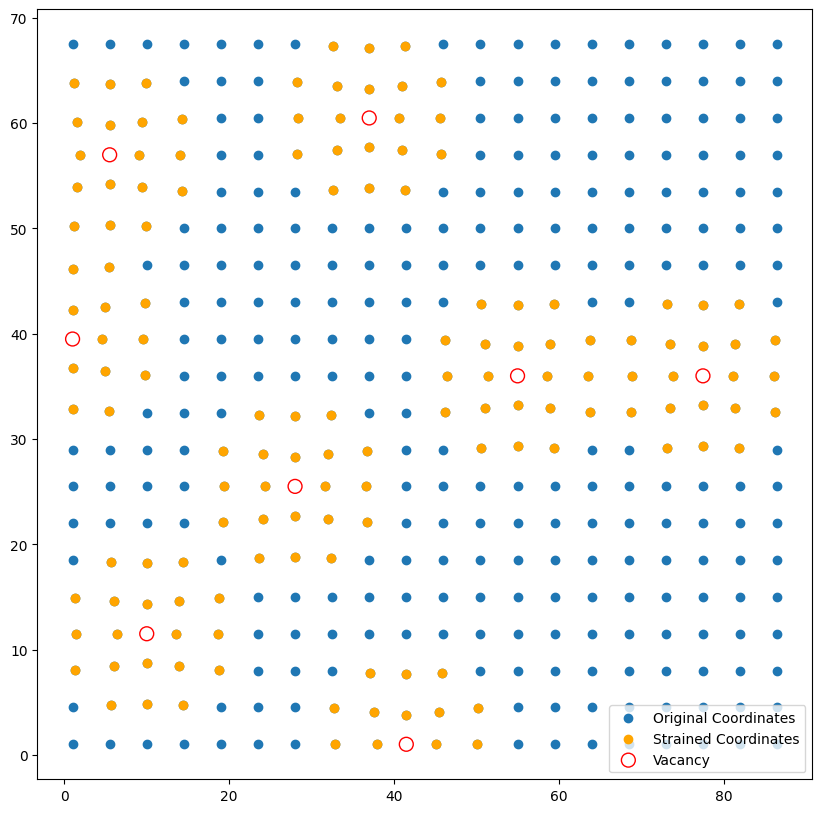

In [17]:
a1 = np.array([4.5,0])
a2 = np.array([0,3.5])
nSites = 20
coords = create_lattice(nSites,a1,a2)
nAtoms = coords.shape[0]
 
nVacancies = int(nAtoms * 0.01) * 2

# Create Empty Coordinates for Book-Keeping 
vacancyCoords = np.zeros([nVacancies,2]); vacancyInds = np.zeros([nVacancies])

strainedCoords =  np.empty((0,2), float);  strainedInds = np.array([],dtype=int)

vac = 0
plt.figure(figsize=(10,10))
while vac < nVacancies:

    # Sample A Random Coordinate in Lattice
    vacancyInd = np.random.randint(0,nAtoms)

    # Remove Center Coordinate 
    vacancy = coords[vacancyInd,]

    # Displacement Vectors towards Vacancy
    xDir = vacancy[0] - coords[:,0]; yDir = vacancy[1] - coords[:,1] 

    # Measure Distance From Vacancy
    dist = np.sqrt((coords[:,0] - vacancy[0])**2 + (coords[:,1]-vacancy[1])**2)

    # # Distance Vectors
    # xDir = vacancy[0] - coords[:,0]; yDir = vacancy[1] - coords[:,1] 

    # Estimate Number Nearst Neighbors around Vacancy
    aLim = np.minimum(a1[0],a2[1])
    nnInds = np.where(dist < aLim * 3)[0]
    new_coords = np.zeros([nnInds.shape[0],2])
    new_coords_ind = 0

    # Create 3D Gaussian for Estimating Displacement
    xLims = np.around(np.arange(np.min(coords[nnInds,0]),np.max(coords[nnInds,0])+0.1,0.1),decimals=1)
    yLims = np.around(np.arange(np.min(coords[nnInds,1]),np.max(coords[nnInds,1])+0.1,0.1),decimals=1)
    x, y = np.meshgrid(xLims,yLims)
    print()
    A = 1 / 3 
    Vlj = A * np.exp(-((x - vacancy[0])**2 / (2 * a1[0]**2) + (y - vacancy[1])**2. / (2 * a2[1]**2 )))

    # Add Strain to Coordinates 
    for ind in nnInds:
        
        xInd = np.where( xLims == coords[ind,0] )[0][0]
        yInd = np.where( yLims == coords[ind,1] )[0][0]

        scale = Vlj[yInd,xInd]
        
        new_coords[new_coords_ind,0] = coords[ind,0] + xDir[ind] * scale
        new_coords[new_coords_ind,1] = coords[ind,1] + yDir[ind] * scale

        new_coords_ind += 1

    # Check if We have Already Change these coordinates, if not continue forward
    if bool(set(nnInds) & set(strainedInds)): pass
    else:
        vacancyInds[vac] = vacancyInd 

        # Stitch The Data backtogether 
        strainedCoords = np.append(strainedCoords,new_coords,axis=0)
        strainedInds = np.append(strainedInds,nnInds)

        # Remove Vacancy
        vacancyCoords[vac,] = vacancy
        
        # nAtoms = coords.shape[0]
        vac += 1

removeInds = np.zeros(nVacancies,dtype=int)
for ii in range(nVacancies): removeInds[ii] = np.where(vacancyInds[ii] == strainedInds)[0][0]
strainedCoords = np.delete(strainedCoords,removeInds,axis=0)
strainedInds = np.delete(strainedInds,removeInds)

coords[strainedInds,] =  strainedCoords

coords = np.delete(coords,vacancyInds.astype(int),axis=0)

plt.scatter(coords[:,0],coords[:,1],label='Original Coordinates',color='C0',zorder=1)
plt.scatter(strainedCoords[:,0],strainedCoords[:,1],label='Strained Coordinates',color='orange',zorder=2)
plt.scatter(vacancyCoords[:,0],vacancyCoords[:,1],s=100,edgecolors='r',facecolors='none',label='Vacancy')
plt.legend(loc='lower right')

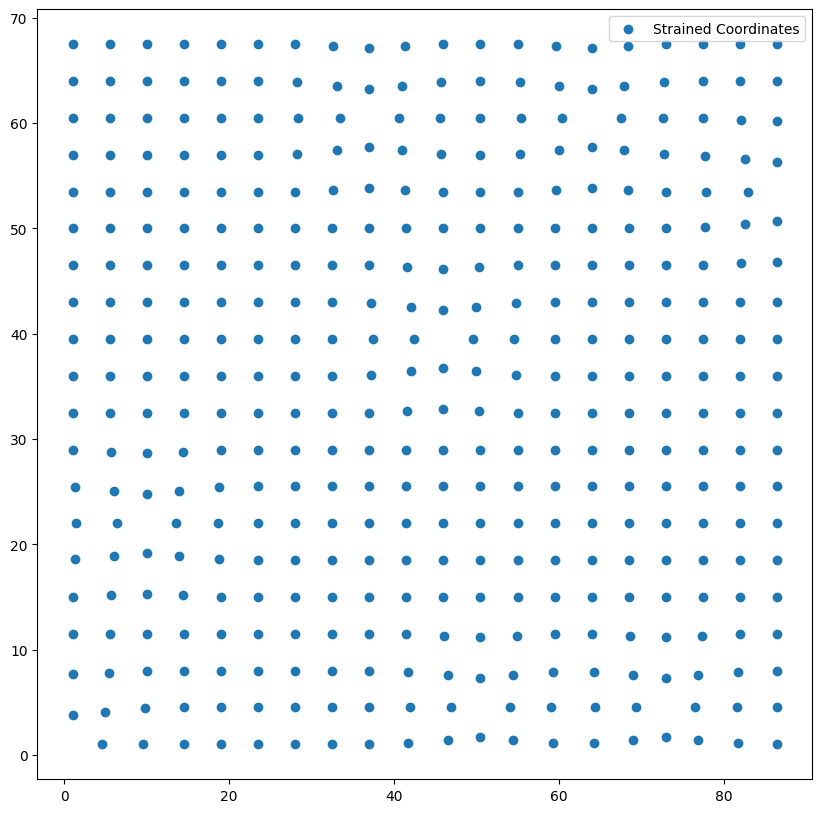

In [10]:
plt.figure(figsize=(10,10))
# coords[strainedInds,] =  strainedCoords
plt.scatter(coords[:,0],coords[:,1],label='Strained Coordinates',color='C0',zorder=1)
# plt.scatter(vacancyCoords[:,0],vacancyCoords[:,1],s=100,edgecolors='r',facecolors='none',label='Vacancy')
plt.legend()

In [11]:
a1 = np.array([3.5,0])
a2 = np.array([0,3.5])


nSites = 25

nVacancies = 5

ind = 0
coords = np.zeros([nSites**2,2])
for i in range(nSites):
    for j in range(nSites):
        coords[ind,] = i * a1 + j * a2 + 1 
        ind += 1

# Remove Random Coordinates
vacancy = np.array([]); vacancyInds = np.array([])
for i in range(nVacancies):
    vacancyInd = 
    vacancy = 
?
vacancy = coords[vacancyInd,]
coords = np.delete(coords,vacancyInd,axis=0)

lims = np.around(np.arange(np.min(coords),np.max(coords)+0.1,0.1),decimals=1)
x, y = np.meshgrid(lims,lims)
r = np.sqrt( (x - vacancy[0])**2 + (y - vacancy[1])**2 ) 

eps = 5
sigma = 0.5 * a1[0]
A = 4 * eps * sigma**12
B = 4 * eps * sigma**6
Vlj = A/(r**12) + B/(r**6)

plt.imshow(Vlj[::-1],extent=[lims[0],lims[-1],lims[0],lims[-1]],vmax=1e0); plt.colorbar()
plt.scatter(coords[:,0],coords[:,1],color='r')

SyntaxError: invalid syntax (2316857034.py, line 19)

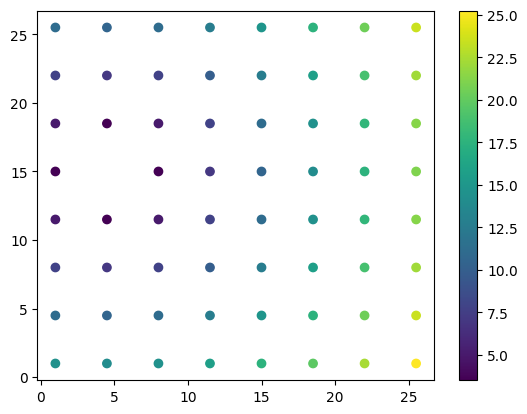

In [ ]:
dist = np.sqrt((coords[:,0] - vacancy[0])**2 + (coords[:,1]-vacancy[1])**2)
plt.scatter(coords[:,0],coords[:,1],c=dist); plt.colorbar()
# for i in range(coords.shape[0]):
#     NN = 

#### Loenard Jones Potential

In [ ]:
eps = 5
sigma = 0.5 * a1[0]
A = 4 * eps * sigma**12
B = 4 * eps * sigma**6
r = np.sqrt( (x - vacancy[0])**2 + (y - vacancy[1])**2 ) 
Vlj = A/(r**12) + B/(r**6)